In [1]:
%pylab inline
from ast import literal_eval
from struct import *
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

Populating the interactive namespace from numpy and matplotlib


##FA Grid
####By Sergio Daniel Hernandez Charpak

Notebook to try to interact with the Fractional Anisotropy (FA) grid directly from the CIC files. 
Here we read the results and plot them.

In [2]:
def writeFirstLine(filename,line):
    with open(filename,'r+') as f:
        content = f.read()
        f.seek(0,0)
        f.write(line.rstrip('\r\n') + '\n' + content)
def readFirstLine(filename):
    with open(filename, 'r') as f:
        first_line = f.readline()
        return first_line

The next function reads the eigenvalues

In [3]:
def read_CIC_scalar(filename):
    f = open(filename, "rb")
    dumb = f.read(38)

    dumb = f.read(4)
    n_x = f.read(4)
    n_y = f.read(4)
    n_z = f.read(4)
    nodes = f.read(8)
    x0 = f.read(4)
    y0 = f.read(4)
    z0 = f.read(4)
    dx = f.read(4)
    dy = f.read(4)
    dz = f.read(4)
    dumb = f.read(4)

    n_x = (unpack('i', n_x))[0]
    n_y = (unpack('i', n_y))[0]
    n_z = (unpack('i', n_z))[0]
    nodes = (unpack('q', nodes))[0]
    dx = (unpack('f', dx))[0]
    dy = (unpack('f', dy))[0]
    dz = (unpack('f', dz))[0]
    x0 = (unpack('f', x0))[0]
    y0 = (unpack('f', y0))[0]
    z0 = (unpack('f', z0))[0]
    print n_x, n_y, n_z, nodes, dx, dy, dz

    total_nodes = n_x * n_y *n_z
    dumb = f.read(4)
    array_data = f.read(total_nodes*4)
    dumb = f.read(4)
    format_s = str(total_nodes)+'f'
    array_data = unpack(format_s, array_data)
    f.close()
    array_data  = np.array(array_data)
    array_data.resize(n_z,n_y,n_x)
    array_data = array_data.transpose()
    return array_data


def read_CIC_vector(filename):
    f = open(filename, "rb")
    dumb = f.read(38)

    dumb = f.read(4)
    n_x = f.read(4)
    n_y = f.read(4)
    n_z = f.read(4)
    nodes = f.read(4)
    x0 = f.read(4)
    y0 = f.read(4)
    z0 = f.read(4)
    dx = f.read(4)
    dy = f.read(4)
    dz = f.read(4)
    dumb = f.read(4)

    n_x = (unpack('i', n_x))[0]
    n_y = (unpack('i', n_y))[0]
    n_z = (unpack('i', n_z))[0]
    nodes = (unpack('i', nodes))[0]
    dx = (unpack('f', dx))[0]
    dy = (unpack('f', dy))[0]
    dz = (unpack('f', dz))[0]
    x0 = (unpack('f', x0))[0]
    y0 = (unpack('f', y0))[0]
    z0 = (unpack('f', z0))[0]
    print n_x, n_y, n_z, nodes, dx, dy, dz

    total_nodes = 3 * n_x * n_y *n_z
    dumb = f.read(4)
    array_data = f.read(total_nodes*4)
    dumb = f.read(4)
    format_s = str(total_nodes)+'f'
    array_data = unpack(format_s, array_data)
    f.close()
    array_data  = np.array(array_data)
    array_data.resize(n_z,n_y,n_x,3)
    vec = array_data[0,0,0,:]
    vec = array_data[0,0,1,:]
    array_data = array_data.transpose()
    #final shape is [3,n_x,n_y,n_z]
    return array_data


#filein="/store/04/bolshoi/V-web/clues/256/snap_190.CIC.s1.00.eigenvec_1"
def test_vector_plot():
    filein="/home/extforer/TV-Web/data/snap_136.s1.00.eigenvec_1"
    eigenvec_1 = read_CIC_vector(filein)

    x_component = eigenvec_1[0,:,:,:]
    x_component = x_component.flatten()
    x_component = np.absolute(x_component)

    print x_component.shape
    nbins = 20
    mu_bins = np.linspace(0.0,1.0,nbins)
    
    histo_mu_x, mu_x_range = np.histogram(x_component, bins=mu_bins)
    histo_mu_x = 1.0*histo_mu_x
    
    delta_x = 1.0/(1.0*nbins)
    histo_mu_x = histo_mu_x/sum(histo_mu_x)/delta_x
    print histo_mu_x, mu_x_range


    rc('text', usetex=True)
    rc('font', family='serif')

#plt.plot(mu_x_range[:-1], histo_mu_x, label="$e_{3}\cdot \hat{x}$")

    plt.plot(histo_mu_x, histo_mu_x, label="$e_{3}\cdot \hat{x}$")

    ylim([0.8, 1.2])
    xlim([0.0, 1.0])
    plt.legend(loc='upper left')
    plt.xlabel("$M_{1500}$")
    plt.ylabel("$\Phi(M_{1500})$ (Mpc$^{-3}$ mag$^{-1}$)")
    plt.savefig('BOX10909_smooth_1.0_align_e3.pdf')


def test_FA_plot(file1, file2, file3):
    eigenval1  = read_CIC_scalar(file1)
    eigenval2  = read_CIC_scalar(file2)
    eigenval3  = read_CIC_scalar(file3)

    
    FA = (eigenval1-eigenval3)**2  + (eigenval2-eigenval3)**2  + (eigenval1-eigenval2)**2 
    FA = FA/(eigenval1**2 + eigenval2**2 + eigenval3**2)
    FA = np.sqrt(FA)/np.sqrt(3.0)

    cut = FA[40,:,:]

    plt.imshow(cut.T)
    print cut.min(), cut.max()
    plt.savefig('test_FA_cut.pdf')

In [5]:
inputfolder = '../../Outputs/07_04_2016/'
inputfile_1 = 'snapshot_005.eigen_1'
inputfile_2 = 'snapshot_005.eigen_2'
inputfile_3 = 'snapshot_005.eigen_3'

Now let us get the three eigenvalues grids

In [6]:
grid_1 = read_CIC_scalar(inputfolder+inputfile_1)
grid_2 = read_CIC_scalar(inputfolder+inputfile_2)
grid_3 = read_CIC_scalar(inputfolder+inputfile_3)

256 256 256 16777216 976.5625 976.5625 976.5625
256 256 256 16777216 976.5625 976.5625 976.5625
256 256 256 16777216 976.5625 976.5625 976.5625


Now let us form the FA grid

In [7]:
FA = (grid_1-grid_3)**2  + (grid_2-grid_3)**2  + (grid_1-grid_2)**2 
FA = FA/(grid_1**2 + grid_2**2 + grid_3**2)
FA = np.sqrt(FA)/np.sqrt(3.0)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from IPython.kernel.zmq import kernelapp as app


min:  0.107134740824  max:  0.999999999983


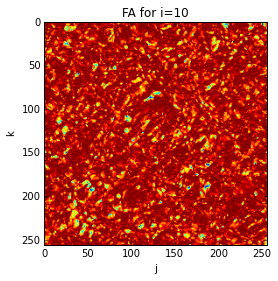

In [8]:
cut = FA[10,:,:]

plt.imshow(cut.T)
plt.title("FA for i=10")
plt.xlabel("j")
plt.ylabel("k")
print "min: ", cut.min()," max: ", cut.max()

In [64]:
n_x,n_y,n_z = shape(FA)

In [65]:
FA_1D = np.zeros(n_x*n_y*n_z)
for i in range (n_x):
    for j in range (n_y): 
        for k in range (n_z):
            FA_1D[i + n_x * (j + n_y * k)] = FA[i,j,k]

AttributeError: max must be larger than min in range parameter.

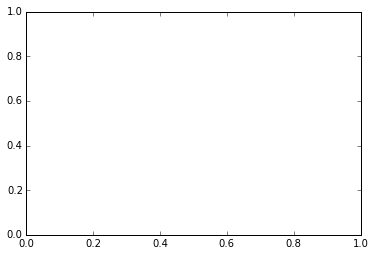

In [69]:
fig = plt.figure()
#binwidth=1
#plt.hist(FA_1D, bins=np.arange(min(FA_1D), max(FA_1D) + binwidth, binwidth))
plt.hist(FA_1D)
#plt.xlabel('
plt.title('FA Histogram', fontsize=20)
#plt.close(fig)

Now let us find the minimum values

In [46]:
n_x,n_y,n_z = shape(FA)
grid_05 = np.ones(shape(FA))
print shape(grid_05)

(256, 256, 256)


In [47]:
for i in range(0,n_x):
    for j in range(0,n_y):
        for k in range(0,n_z):
            if FA[i,j,k]<0.95:
                grid_05[i,j,k] = FA[i,j,k] 
   

min:  0.131182948779  max:  1.0


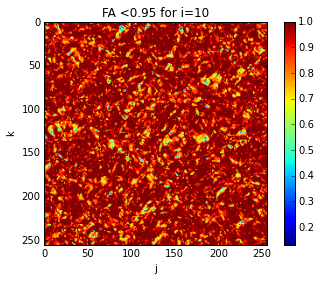

In [48]:
cut_05 = grid_05[0,:,:]

plt.imshow(cut_05.T)
plt.colorbar()
plt.title("FA <0.95 for i=10")
plt.xlabel("j")
plt.ylabel("k")
print "min: ", cut_05.min()," max: ", cut_05.max()

##A Region Accretion Algorithm

In [34]:
n_grid = n_x-1 # the size of box -1, the maximum index
results = np.zeros(shape(FA)) #preps the results matrix
thresh_FA = 0.95

In [ ]:
#Needs to pick the seeds. 
#These correspond to a highly dense FA local minima 

In [35]:
#Predicate to be part of the group
def predicate(i,j,k, seed_FA):
    if(results[i,j,k]==1):
        #It has already been evaluated
        #There is no need to re-evaluate the cell
        return false
    elif( (FA[i,j,k]>=seed_FA) & (FA[i,j,k] <= thresh_FA) ):
        #It validates the predicate
        return true
    else:
        #It fails the predicate
        return false

In [49]:
#The algorithm, it evaluates the special cases
def region_accretion_4_neigboors(i,j,k):
    present_FA = FA[i,j,k]
    #Finds if it is on the border of the grid
    case = 0
    #Cases
    if(i==0):
        case+=1
    if(j==0):
        case+=2
    if(k==0):
        case+=4
    if(i==n_grid):
        case+=8
    if(j==n_grid):
        case+=16
    if(k==n_grid):
        case+=32
    #General case
    if(case==0):
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
    #Special cases
    elif(case==1):
        #face in i=0 # not a border or a corner
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==2):
        #face in j=0 # not a border or a corner
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==3):
        #border at i=0 & j=0 # not a corner 
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==4):
        #face in k=0 # not a border or a corner
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==5):
        #border at i=0 & k=0 # not a corner
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==6):
        #border at j=0 & k=0 # not a corner
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
    
    elif(case==7):
        #corner at i=0 & j=0 & k=0 
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
    
    elif(case==8):
        #face in i=n_grid # not a border or a corner
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==10):
        #border in i=n_grid & j=0
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==12):
        #border i=n_grid & k=0
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k) 
    
    elif(case==14):
        # corner at i=n_grid & k=0 & j=0
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
    
    elif(case==16):
        #face in j=n_grid # not a border or a corner
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==17):
        #border j=n_grid & i=0
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        
    elif(case==20):
        #border j=n_grid & k=0
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==21):
        #corner j=n_grid & k=0 & i=0
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
    
    elif(case==24):
        #border j=n_grid & i=n_grid
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==28):
        #corner j=n_grid & k=0 & i=n_grid
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k+1,present_FA)):
            results[i,j,k+1] = 1
            region_accretion_4_neigboors(i,j,k+1)
    
    elif(case==32):
        #face in k=n_grid # not a border or a corner
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==33):
        #border k=n_grid & i=0
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
    
    elif(case==34):
        #border k=n_grid & j=0
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
    
    elif(case==35):
        #corner at k=n_grid & j=0 & i=0
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==40):
        #border k=n_grid & i=n_grid
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
    
    elif(case==42):
        #corner at k=n_grid & j=0 & i=n_grid
        if(predicate(i,j+1,k,present_FA)):
            results[i,j+1,k] = 1
            region_accretion_4_neigboors(i,j+1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==48):
        #border k=n_grid & j=n_grid
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
    
    elif(case==49):
        #corner at k=n_grid & j=n_grid & i=0
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i+1,j,k,present_FA)):
            results[i+1,j,k] = 1
            region_accretion_4_neigboors(i+1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    
    elif(case==56):
        #corner at k=n_grid & j=n_grid & i=n_grid
        if(predicate(i,j-1,k,present_FA)):
            results[i,j-1,k] = 1
            region_accretion_4_neigboors(i,j-1,k)
        if(predicate(i-1,j,k,present_FA)):
            results[i-1,j,k] = 1
            region_accretion_4_neigboors(i-1,j,k)
        if(predicate(i,j,k-1,present_FA)):
            results[i,j,k-1] = 1
            region_accretion_4_neigboors(i,j,k-1)
    else:
        #it is one of the impossible cases
        print "There is an error for [i,jk]: [" +str(i)+","+str(j)+","+str(k)+"]"
        print "The case encountered was: "+str(case)

In [59]:
#The impossible cases
    """
    if(case==9):
        #i=1 & i=n_grid
        #This should never happen as i cannot be 0 and n_grid at the same time
    if(case==11):
        #i=0 & i=n_grid & j=0
        #This should never happen as i cannot be 0 and n_grid at the same time
    if(case==13):
        # i=0 & i=n_grid & k=0
        #This should never happen as i cannot be 0 and n_grid at the same time
    if(case==15):
        # i=0 & i=n_grid & k=0 & j=0
        #This should never happen as i cannot be 0 and n_grid at the same time
    if(case==18):
        # j=n_grid & j=0
        #This should never happen as j cannot be 0 and n_grid at the same time
    if(case==19):
        # j=n_grid & j=0 & i=0
        #This should never happen as j cannot be 0 and n_grid at the same time
    if(case==22):
        #border j=n_grid & k=0 & j=0
        #This should never happen as j cannot be 0 and n_grid at the same time    
    if(case==23):
        #j=n_grid & k=0 & j=0 & i=0
        #Impossible
    if(case==25):
        #j=n_grid & i=n_grid & i=0
        #Impossible   
    if(case==26):
        #j=n_grid & i=n_grid & j=0
        #Impossible   
    if(case==27):
        #j=n_grid & i=n_grid & j=0 & i=0
        #Impossible 
    if(case==29):
        #j=n_grid & i=n_grid & k=0 & i=0
        #Impossible    
    if(case==30):
        #j=n_grid & i=n_grid & k=0 & j=0
        #Impossible       
    if(case==31):
        #j=n_grid & i=n_grid & k=0 & j=0 & i=0
        #Impossible
    if(case==36):
        #k=n_grid & k=0
        #Impossible
    if(case==37):
        #k=n_grid & k=0 & i=0
        #Impossible
    if(case==38):
        #k=n_grid & k=0 & j=0
        #Impossible  
    if(case==39):
        #k=n_grid & k=0 & j=0 & i=0
        #Impossible 
    if(case==41):
        #k=n_grid & i=n_grid & i=0
        #Impossible
    if(case==43):
        #k=n_grid & j=0 & i=n_grid & i=0
        #Impossible
    if(case==44):
        #k=n_grid &  i=n_grid & k=0
        #Impossible
    if(case==45):
        #k=n_grid &  i=n_grid & k=0 & i=0
        #Impossible
    if(case==46):
        #k=n_grid &  i=n_grid & k=0 & j=0
        #Impossible
    if(case==47):
        #k=n_grid &  i=n_grid & k=0 & j=0 & i=0
        #Impossible
    if(case==50):
        #k=n_grid &  j=n_grid & j=0
        #Impossible
    if(case==51):
        #k=n_grid &  j=n_grid & j=0 & i=0
        #Impossible
    if(case==52):
        #k=n_grid &  j=n_grid & k=0 
        #Impossible
    if(case==53):
        #k=n_grid &  j=n_grid & k=0 & i=0
        #Impossible
    if(case==54):
        #k=n_grid &  j=n_grid & k=0 & j=0
        #Impossible
    if(case==55):
        #k=n_grid &  j=n_grid & k=0 & j=0 & i=0
        #Impossible
    """""

IndentationError: unexpected indent (<ipython-input-59-ee8664679565>, line 2)